In [70]:
%load_ext autoreload
%autoreload 2

import random
import numpy as np
from scipy import stats
from src.qualitative_analysis import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
def calculate_probabilities(X, step):
    prob_dist = stats.norm(loc=0, scale=step)
    scaling_constant = step * np.sqrt(2 * np.pi)
    pdf_values = prob_dist.pdf(X) * scaling_constant
    prob = np.column_stack((1 - pdf_values, pdf_values))
    return prob

In [72]:
# configurable variables
variance = 4
variance_deviations = np.arange(-3, 4, .1)
p_true_dist = stats.norm(loc=0, scale=variance)
X = p_true_dist.rvs(size=40000)

In [73]:
p_true = calculate_probabilities(X, variance)
print(p_true)
y_true = np.array(list(map(lambda x: 1 if random.random() < x[1] else 0, p_true)))

[[0.00500834 0.99499166]
 [0.30706419 0.69293581]
 [0.04837932 0.95162068]
 ...
 [0.07983211 0.92016789]
 [0.07616456 0.92383544]
 [0.83776092 0.16223908]]


Plotting Predicted Probability Distributions...


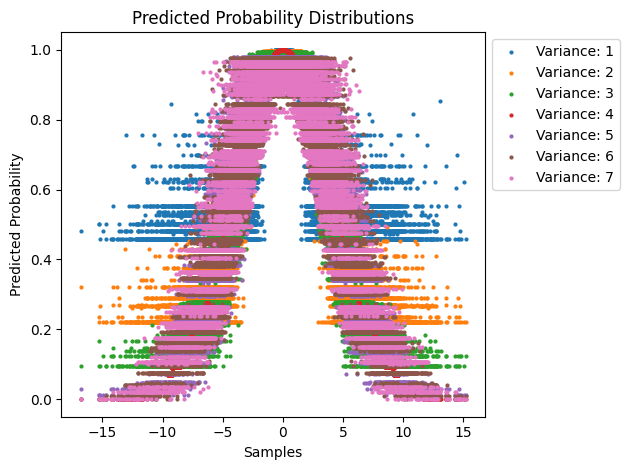

In [78]:
util.plot_p_pred_dists(
    np.arange(variance - 3, variance + 4, 1),
    X,
    calculate_probabilities,
    "Variance"
)

Plotting True Probability Reliability Diagram...


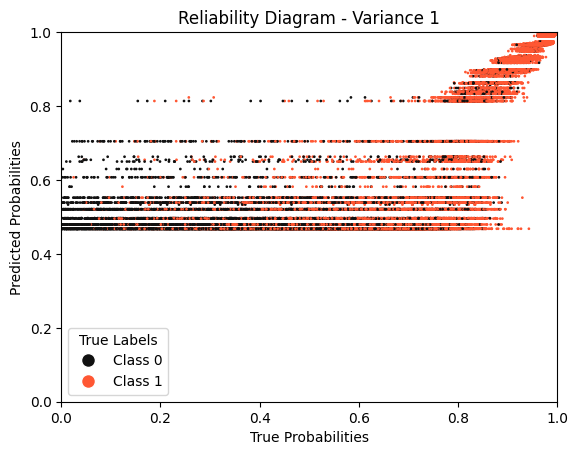

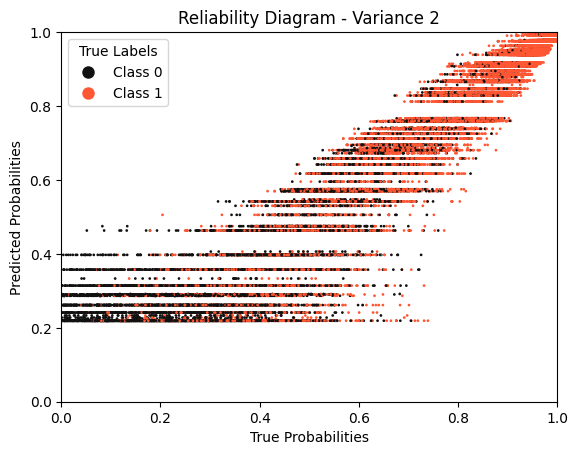

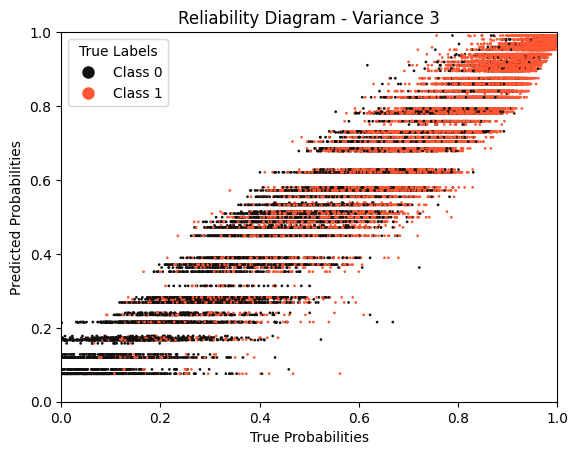

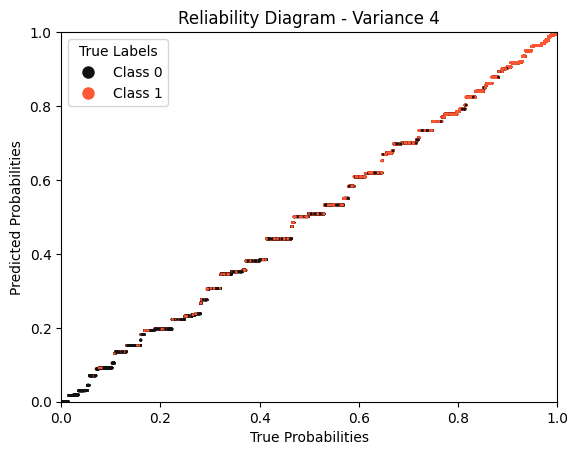

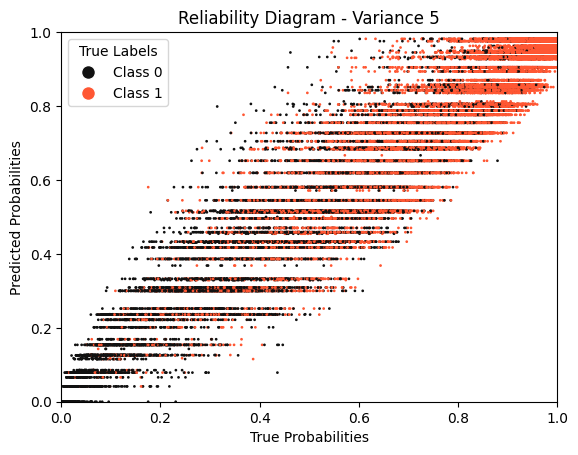

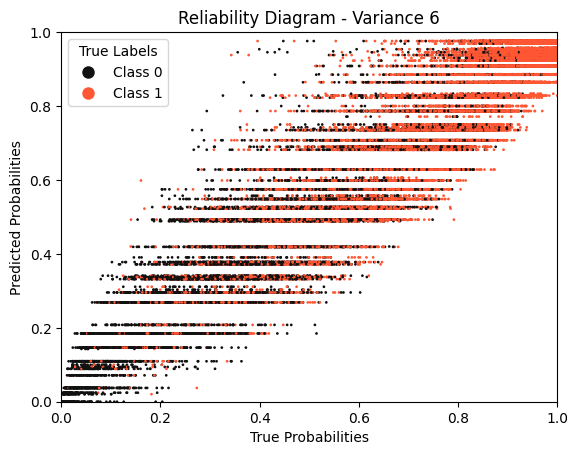

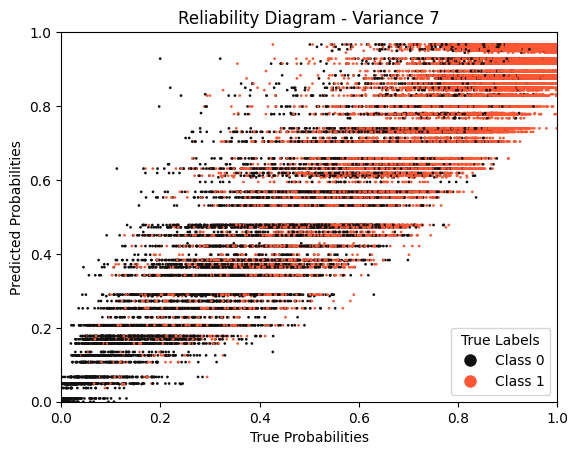

In [75]:
util.plot_p_true_reliability_diagrams(
    np.arange(variance - 3, variance + 4, 1),
    X, p_true, y_true,
    calculate_probabilities,
    "Variance"
)

In [76]:
true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals = (
    util.calculate_metrics(
        variance + variance_deviations,
        p_true, y_true, X, 
        calculate_probabilities,
        log="Variance"
    )
)

Variance:  1.0


KeyboardInterrupt: 

In [ ]:
util.plot_metrics(
    variance, variance + variance_deviations,
    p_true, y_true,
    true_ece_vals, ece_vals, balance_score_vals, fce_vals, tce_vals, ksce_vals, ace_vals,
    "Metric Behaviour on Variance Squeeze with Dynamic Rescaling",
    "Variance"
)